# **Análise de Risco de Crédito utilizando *Machine Learning* em Python**

Em operações que envolvem um tempo entre a posse do produto ou serviço e o seu pagamento, normalmente, ocorrem em condições de crédito, portanto deve existir uma relação de confiança entre as partes envolvidas.

No entanto, também surge uma probabilidade do pagamento não ocorrer conforme o esperado, ou seja, o risco de crédito. Com isso, se faz necessário a **avaliação** desse **risco de crédito** para evitar a inadimplência, pois se muitos clientes começarem a não honrar com o pagamento, pode gerar grandes prejuízos para a instituição.

Assim, uma forma de avaliar o *default* (termo utilizado para indicar o não cumprimento das obrigações e/ou condições de um empréstimo) é utilizando modelos de *Machine Learning*.

<center><img src="https://i.imgur.com/mEzqBYc.jpeg" width=800 /></center>

## **Entendendo o problema**

Neste projeto, vou utilizar um conjunto de dados para criar um modelo de *Machine Learning* para prever a probabilidade de um cliente do Nubank não pagar a fatura do seu Cartão de Crédito.

Com isso, o objetivo desse projeto é identificar a probabilidade de um cliente se tornar inadimplente. Ainda, vale lembrar que é necessário fazer essa avaliação no momento em que o cliente solicitar o cartão de crédito.

Além disso, com a construção do modelo espera-se que ele seja capaz de reduzir as perdas do Nubank com inadimplência, mas também minimizar os falsos positivos.

> O conjunto de dados está disponível [neste link](https://www.dropbox.com/s/otmdh1o2xgulleg/acquisition_train.csv?dl=0).

## **Importandos as bibliotecas necessários e o conjunto de dados**

In [5]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from yellowbrick.classifier import ROCAUC

from imblearn.under_sampling import RandomUnderSampler

# Configurações do notebook
sns.set(style="white")
%matplotlib inline

# Removendo avisos
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Importando os dados
df = pd.read_csv("http://dl.dropboxusercontent.com/s/otmdh1o2xgulleg/acquisition_train.csv?dl=0")

## **Análise Exploratória dos Dados**

**Dimensões do conjunto de dados**

In [7]:
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Linhas:		45000
Colunas:	43


**Primeiras entradas do conjunto de dados**

In [8]:
# Primeiras entradas
pd.set_option('display.max_columns', None)
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


**Nome das colunas**

In [9]:
# Nome das colunas
pd.DataFrame(df.columns)

,0
0,ids
1,target_default
2,score_1
3,score_2
4,score_3
5,score_4
6,score_5
7,score_6
8,risk_rate
9,last_amount_borrowed


Apenas com essas análises iniciais, já podemos perceber que:
- A nossa coluna objetivo (ou seja, a que se deseja avaliar) é a `target_default`. 
- A coluna `ids` é a coluna que serve para identificar anonimamente cada cliente, ou seja, não acrescenta nenhuma informação útil para o nosso projeto.
- As colunas `score_1`, `score_2`. `reason`, `state`, `zip`, `channel`, `job_name` e `real_state` apresentam algum tipo de codificação, mais a frente verificaremos elas para ver se há alguma informação útil nessas colunas.
- A coluna `lat_lon`, que identifica a latitude e longitude do cliente, está no formato *string* contendo uma tupla.
- A coluna `target_fraud` seria a coluna objetivo de um modelo para a detecção de fraudes, utilizando o mesmo conjunto de dados.
- A coluna `profile_tags` está no formato de dicionário aparentando apresentar algum tipo de *tag* para cada cliente.
- A coluna `external_data_provider_first_name` parece apresentar primeiro nome de cada cliente, o que provavelmente, não trará nenhuma informação relevante ao conjunto de dados, no entanto verificaremos isso mais a frente.
- A coluna `user_agent` apresenta qual sistema o cliente utilizou para acessar o aplicativo do Nubank, possivelmente não trará nenhuma informação relevante ao nosso projeto, no iremos verificar mais a frente.

**Tipo de cada coluna**

In [10]:
pd.DataFrame(df.dtypes)

,0
ids,object
target_default,object
score_1,object
score_2,object
score_3,float64
score_4,float64
score_5,float64
score_6,float64
risk_rate,float64
last_amount_borrowed,float64


**Resumo estatístico das colunas numéricas**

In [11]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Como podemos perceber pelo resumo estatístico:
- A coluna `reported_income`, possui um valor máximo infinito (`inf`), ou seja, provavelmente foi algum erro no momento da coleta, por isso, vamos transformar esses valores de `inf` para `NaN`.
- A coluna `external_data_provider_email_seen_before` apresenta valor mínimo de -999 e como podemos perceber pelos outros valores do resumo estatístico dessa coluna, esse valor é estranho, portanto vamos construir o boxplot para extrair mais informações.
- A coluna `external_data_provider_credit_checks_last_2_year` apresenta todos os valores iguais a zero, portanto não irá afetar o nosso modelo e essa coluna será descartada.

Assim, fazendo o boxplot para a coluna `external_data_provider_email_seen_before`:

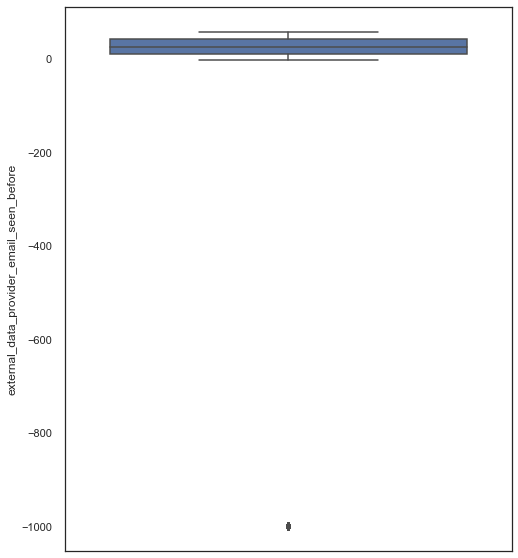

In [12]:
# Construindo o boxplot
fig, ax = plt.subplots(figsize=(8,10))

sns.boxplot(y = df['external_data_provider_email_seen_before'], ax=ax);

Como podemos perceber pelo boxplot, o valor -999 na coluna `external_data_provider_email_seen_before` representa um *outlier*, sendo assim vamos transformá-lo em `NaN`.

**Valores ausentes**

Agora, vamos verificar os valores ausentes no conjunto de dados.

In [13]:
print("Percentual de valores ausentes em cada coluna:")
round(((df.isnull().sum() / df.shape[0]) * 100), 2).sort_values(ascending=False)

Percentual de valores ausentes em cada coluna:


target_fraud                                        96.62
last_amount_borrowed                                66.57
last_borrowed_in_months                             66.57
ok_since                                            58.99
external_data_provider_credit_checks_last_2_year    50.28
external_data_provider_credit_checks_last_year      33.61
credit_limit                                        30.67
n_issues                                            25.65
facebook_profile                                     9.91
marketing_channel                                    7.95
job_name                                             7.41
target_default                                       7.24
external_data_provider_email_seen_before             4.96
lat_lon                                              3.03
user_agent                                           1.60
n_bankruptcies                                       1.55
n_defaulted_loans                                    1.28
reason        

Analisando os valores ausentes nesse conjunto de dados, percebemos que:
- A coluna `target_fraud` apresenta 96.62% de valores ausentes, mas como o objetivo desse projeto não analisar a fraude, vamos eliminar essa coluna posteriormente.
- As colunas `last_amount_borrowed`, `last_borrowed_in_months` , `ok_since` e `external_data_provider_credit_checks_last_2_year` apresentam mais de 50% de valores ausentes, portanto teremos que verificá-las com cautela para definir o tratamento que faremos com elas.
- As colunas `external_data_provider_credit_checks_last_year`, `credit_limit` e `n_issues` apresentam de 25 a 35% de valores ausentes e também vamos definir a melhor abordagem para tratá-los.
- A coluna `target_default`, que é a nossa variável objetivo, tem 7.24% de valores ausentes e serão removidos do conjunto de dados.

**Quantidade de valores únicos por coluna**

É importante verificarmos a quantidade de valores únicos por coluna para podermos identificar classes categóricas, mas que estão dispostas como números. Assim:

In [14]:
print("Valores únicos por coluna:")
print(df.nunique().sort_values(ascending=False))

Valores únicos por coluna:
ids                                                 45000
profile_phone_number                                45000
score_4                                             45000
score_5                                             45000
score_6                                             45000
income                                              41211
reported_income                                     40025
application_time_applied                            35543
external_data_provider_first_name                   32886
job_name                                            32265
shipping_zip_code                                   28263
profile_tags                                        26131
lat_lon                                             22412
credit_limit                                        20928
reason                                              14874
last_amount_borrowed                                14325
external_data_provider_fraud_score           

Como era esperado a coluna `ids` possui todas as entradas únicas, além disso notamos a coluna `profile_phone_number` também tem todas as entradas únicas e isso não é estranho, pois essa coluna representa número de telefone de cada e, provavelmente, não traz nenhuma informação relevante para o nosso projeto e assim eliminaremos essa coluna.

Ainda, as colunas `external_data_provider_credit_checks_last_2_year` e `channel`possuem apenas uma entrada única e como não temos mais informações sobre essas colunas iremos descartá-las.

**Balanceamento da variável objetivo**

Ainda, é importante verificarmos o balanceamento da coluna `target_default` que é a nossa variável objetivo. Assim:

Porcentagem de cada classe presente na variável target_default:
False    77.96
True     14.80
Name: target_default, dtype: float64




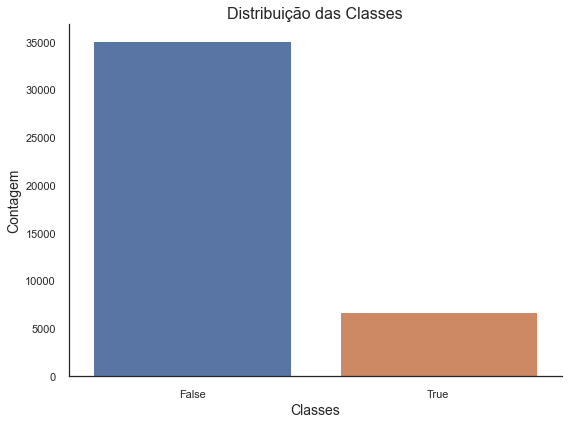

In [15]:
print("Porcentagem de cada classe presente na variável target_default:")
print(round((df['target_default'].value_counts() / df.shape[0]) * 100, 2))
print("\n")

# Construindo o gráfico
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x = df['target_default'], ax=ax)
sns.despine()

ax.set_title("Distribuição das Classes", fontsize=16)
ax.set_xlabel("Classes", fontsize=14)
ax.set_ylabel("Contagem", fontsize=14)

plt.tight_layout()

Percebemos que a classe `True` apresenta apenas 14.80% das entradas na variável `target_default` e a classe `False`, 77.96%. Sendo assim, a variável `target_default` está desbalanceada, e com o gráfico Distribuição das Classes podemos perceber esse desbalanceamento de forma visual.

## **Preparação e Tratamento dos Dados**

**Remoção as colunas desnecessárias**

In [16]:
# Criando uma cópia do conjunto de dados
df_clean = df.copy()

# Substituindo inf por nan em reported_income
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf, np.nan)

# Removendo as colunas desnecessárias
df_clean.drop(['target_fraud', 'external_data_provider_credit_checks_last_2_year', 'channel', 'ids', 'profile_phone_number'], axis = 1, inplace=True)

# Verificando o nome das colunas após a remoção
df_clean.columns

Index(['target_default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5',
       'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'reported_income', 'shipping_state', 'shipping_zip_code',
       'profile_tags', 'user_agent'],
      dtype='object')

Além disso, vamos remover as colunas sem mais informações, pois seria necessário uma pesquisa muito aprofundada para entender o que essas colunas representam e mesmo assim poderíamos chegar em "um beco sem saída". O que poderia ser muito prejudicial para os recursos, se estivéssemos implantados isso em uma empresa, onde o fator tempo é essencial. Assim:

In [17]:
# Eliminando as colunas sem informações
sem_info = ['reason', 'zip', 'job_name', 'email', 'external_data_provider_first_name', 'lat_lon', 
            'shipping_zip_code','profile_tags', 'user_agent', 'marketing_channel', 'shipping_zip_code', 'application_time_applied']

df_clean.drop(labels = sem_info, axis = 1, inplace=True)

# Verificando o nome das colunas
df_clean.columns

Index(['target_default', 'score_1', 'score_2', 'score_3', 'score_4', 'score_5',
       'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'income', 'facebook_profile',
       'state', 'real_state', 'ok_since', 'n_bankruptcies',
       'n_defaulted_loans', 'n_accounts', 'n_issues',
       'application_time_in_funnel',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_fraud_score', 'reported_income',
       'shipping_state'],
      dtype='object')

**Valores ausentes**

Nessa seção, faremos o tratamento dos valores ausentes.

Para começar, vamos eliminar as linhas que possuem valores ausentes da variável objetivo `target_default`. Assim:

In [18]:
# Eliminando as linhas que possuem valores na variável target_default
df_clean.dropna(subset=['target_default'], inplace=True)

# Verificando
print("Verificação dos valores ausentes na variável target_default após o tratamento: {}".format(df_clean['target_default'].isnull().sum()))

Verificação dos valores ausentes na variável target_default após o tratamento: 0


Verificando novamente o balanceamento da variável objetivo `target_default`:

Porcentagem de cada classe presente na variável target_default após a remoção dos valores ausentes:
False    84.04
True     15.96
Name: target_default, dtype: float64




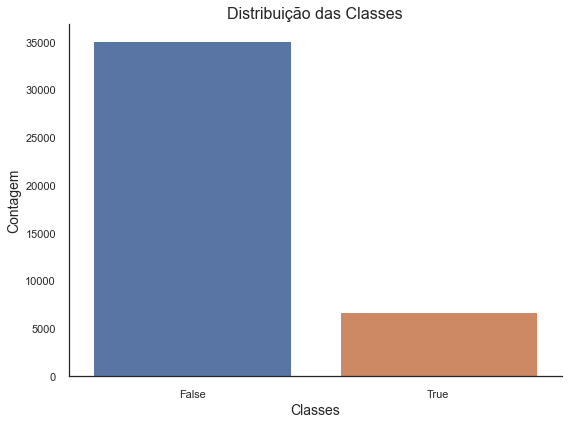

In [19]:
print("Porcentagem de cada classe presente na variável target_default após a remoção dos valores ausentes:")
print(round((df_clean['target_default'].value_counts() / df_clean.shape[0]) * 100, 2))
print("\n")

# Construindo o gráfico
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x = df_clean['target_default'], ax=ax)
sns.despine()

ax.set_title("Distribuição das Classes", fontsize=16)
ax.set_xlabel("Classes", fontsize=14)
ax.set_ylabel("Contagem", fontsize=14)

plt.tight_layout()

Como podemos perceber, mesmo após a remoção dos valores ausentes, a variável `target_default` ainda apresenta-se bastante desbalanceada, posteriormente faremos o balanceamento.

Também há outras variáveis com valores ausentes, no entanto como não temos muitas informações sobre elas podemos assumir que:

- Alguns campos não têm preenchimento no momento do cadastro, como, por exemplo, a variável `facebook_profile`;
- Algumas colunas podem indicar que os valores ausentes são, na verdade, valores nulos como são os casos das colunas `last_amount_borrowed`, `last_borrowed_in_months` e `n_issues`.

Sendo assim, para o segundo caso, vamos substituir os valores ausentes por zero. E o restante faremos das seguinte forma: para as variáveis numéricas vamos substituir os valores ausentes pelo valor da mediana e para as categóricas utilizaremos o valor mais frequente.

In [20]:
# Separando as colunas categóricas e as numéricas
col_num = df_clean.select_dtypes(exclude='object').columns
col_cat = df_clean.select_dtypes(include='object').columns

# Substituindo os valores ausentes
df_clean['last_amount_borrowed'].fillna(value=0, inplace=True)
df_clean['last_borrowed_in_months'].fillna(value=0, inplace=True)
df_clean['n_issues'].fillna(value=0, inplace=True)

# Substituindo valores ausentes nas variáveis numéricas
num_imputer = SimpleImputer(missing_values = np.nan, strategy='median')
num_imputer = num_imputer.fit(df_clean.loc[:, col_num])
df_clean.loc[:, col_num] = num_imputer.transform(df_clean.loc[:, col_num])

# Substituindo valores ausentes nas variáveis categóricas
cat_imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
cat_imputer = cat_imputer.fit(df_clean.loc[:, col_cat])
df_clean.loc[:, col_cat] = cat_imputer.transform(df_clean.loc[:, col_cat])

Verificando que as variáveis não possuem mais valores ausentes após o tratamento:

In [21]:
# Valores ausentes
print("Valores ausentes:")
df_clean.isnull().sum()

Valores ausentes:


target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

**Padronização das variáveis**

Para as variáveis numéricas, iremos utilizar o método `StandardScaler` para fazer a padronização:

In [22]:
df_pdz = df_clean.copy()

# Padronizando as variáveis numéricas
cols_num = df_pdz.drop('target_default', axis=1).select_dtypes(exclude='object').columns

df_pdz[cols_num] = StandardScaler().fit_transform(df_pdz[cols_num].values)

Com as variáveis categóricas, vou utilizar o método `LabelEncoder` para assim transformar estas variáveis em *labels* e inserir no modelo de *Machine Learning*.

In [23]:
df_enc = df_pdz.copy()

# Extraindo as variáveis categóricas
cols_cat = df_enc.select_dtypes('object').columns

# Transformando cada variável categórica
for col in cols_cat:
    df_enc[col+'_enc'] = LabelEncoder().fit_transform(df_enc[col])
    df_enc.drop(col, axis=1, inplace=True)

In [24]:
df_enc.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_enc,score_2_enc,state_enc,real_state_enc,shipping_state_enc
0,False,0.032154,0.563484,-0.832617,0.848870,1.039282,2.627224,1.11413,-1.031599,-0.116075,1.412589,-0.094349,-0.278592,-0.057693,1.604337,1.577495,1.341208,0.444809,-1.427247,0.306407,0.501783,-0.040691,0,10,44,1,12
1,False,0.213805,-0.924750,1.538588,-0.789902,-0.536149,-0.577743,-0.68792,0.283752,0.553756,-0.707920,1.191063,-0.278592,-0.057693,0.732520,0.937596,0.671463,-0.452701,-1.427247,0.029013,-0.894101,-0.040691,3,16,47,1,20
2,True,0.122980,0.006361,-0.512003,1.294382,-0.043827,0.345051,1.11413,-0.196782,-0.115893,-0.707920,-0.094349,-0.278592,-0.057693,-0.139296,-1.302049,-1.652141,0.444809,0.700650,-0.036256,-1.512178,-0.040691,3,9,32,3,19
3,False,1.485366,0.500243,1.694857,-0.500560,0.251567,-0.577743,-0.68792,0.775941,-0.043057,-0.707920,-0.094349,3.365634,-0.057693,1.822291,1.737469,1.081511,1.342319,0.700650,0.200345,1.092082,-0.040691,0,21,23,3,17
4,False,1.394540,-0.481355,0.114978,1.816579,-1.126935,-0.577743,-0.68792,-0.196782,-0.211806,1.412589,-0.094349,-0.278592,-0.057693,0.078658,-1.302049,-0.052955,0.444809,0.700650,0.265614,-0.626730,-0.040691,2,1,47,3,12


## **Construção dos Modelos de *Machine Learning***

Para as construção dos modelos de *Machine Learning*, primeiro é necessário separar os dados em treino e teste, sendo que os dados de teste só serão utilizados ao final do projeto, para, assim, fazermos uma avaliação mais próxima possível do real.

**Aviso:**

> Em algumas células irei colocar a função `np.random.seed(número_qualquer)` para garantir a replicabilidade do projeto, ou seja, se qualquer pessoa executar os códigos utilizados aqui em seu próprio notebook > irá obter os mesmos resultados obtidos nesse projeto. Para maiores informações sobre o assunto: [clique aqui](https://www.geeksforgeeks.org/random-seed-in-python/).



In [25]:
# Garantindo replicabilidade
np.random.seed(752)

# Separando as variáveis independentes e a variável objetivo Churn
X = df_enc.drop('target_default', axis=1)
y = df_enc['target_default']

# Separando o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Ainda, temos que realizar o balanceamento dos dados de treino e para isso vamos utilizar o método de *[Under Sampling](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/)*.

Entradas da variável target_default após o balanceamento:
False    4996
True     4996
Name: target_default, dtype: int64 



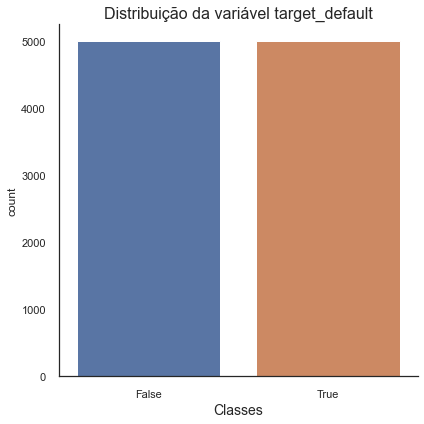

In [26]:
# Garantindo replicabilidade
np.random.seed(752)

# Modelo para balancear os dados
und = RandomUnderSampler()

X_und, y_und = und.fit_sample(X_train, y_train)

# Verificando o balanceamento dos dados
print("Entradas da variável target_default após o balanceamento:")
print(pd.Series(y_und).value_counts(), "\n")

# Plotando a nova distribuição da variável target_default
fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(pd.Series(y_und), ax=ax)

sns.despine()

ax.set_title("Distribuição da variável target_default", fontsize=16)
ax.set_xlabel("Classes", fontsize=14)

plt.tight_layout()

### **Modelos de *Machine Learning***

Neste projeto, irei avaliar três modelos de *Machine Learning* para o problema apresentado, são eles:
- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=classifier#sklearn.ensemble.RandomForestClassifier);
- [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html);
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html).

Para cada modelo, irei ajustar os respectivos parâmetros e como métrica de avaliação de cada modelo será a [AUC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772) e, para uma melhor visualização, dessa métrica vou plotar a [curva ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772).

***Random Forest***

Vamos começar otimizando o modelo *Random Forest* e o primeiro parâmetro a ser ajustado será o `n_estimators`:

In [27]:
# Garantindo replicabilidade
np.random.seed(752)

# Modelo Random Forest
rf_model = RandomForestClassifier()

# Ajustando o melhor valor para n_estimators
par = {'n_estimators': range(100, 1000, 100)}

rf_clf = GridSearchCV(rf_model, par, cv=ShuffleSplit(n_splits=1, test_size=0.3, random_state=77))
rf_clf.fit(X_und, y_und)

# Visualizar o melhor ajuste
print("Melhor ajuste: {}".format(rf_clf.best_params_))

Melhor ajuste: {'n_estimators': 200}


Agora com o `n_estimators = 200`, vamos ajustar o parâmetro `max_depth`:

In [28]:
# Garantindo replicabilidade
np.random.seed(752)

# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators = 200)

# Ajustando o melhor valor para n_estimators
par = {'max_depth': range(2, 10, 1)}

rf_clf = GridSearchCV(rf_model, par, cv=ShuffleSplit(n_splits=1, test_size=0.3, random_state=77))
rf_clf.fit(X_und, y_und)

# Visualizar o melhor ajuste
print("Melhor ajuste: {}".format(rf_clf.best_params_))

Melhor ajuste: {'max_depth': 9}


Agora com os parâmetros `n_estimators` e `max_depth` ajustados, vamos treinar o modelo *Random Forest*:

In [29]:
# Garantindo replicabilidade
np.random.seed(752)

# Construindo o modelo com n_estimators = 600 e max_depth = 9
rf_model = RandomForestClassifier(n_estimators = 200, max_depth = 9)

# Fit (ajuste) do modelo
rf_model.fit(X_und, y_und)

# Fazendo previsões
y_pred_rf = rf_model.predict(X_test)

Avaliando o desempenho do modelo *Random Forest* utilizando a Área sob a curva (AUC):

In [30]:
# Garantindo replicabilidade
np.random.seed(752)

print("Área sob a curva (AUC):\t{}%".format(round(roc_auc_score(y_test, y_pred_rf) * 100, 2)))

Área sob a curva (AUC):	65.61%


Plotando a curva ROC:

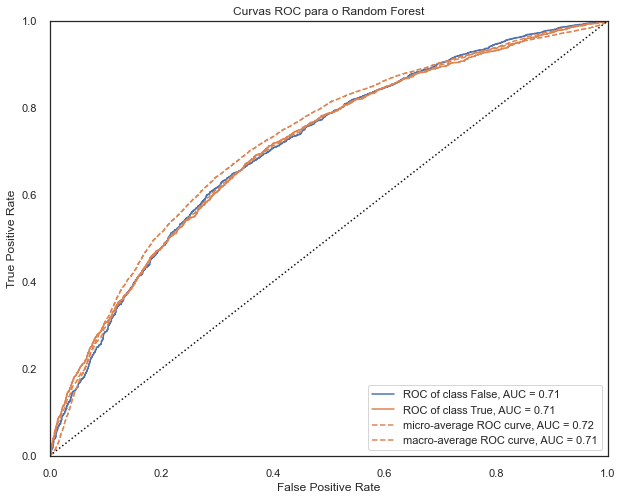

In [31]:
# Garantindo replicabilidade
np.random.seed(752)

# Plotando a curva ROC:
fig, ax = plt.subplots(figsize=(10,8))
vis_rf = ROCAUC(rf_model, classes=['False', 'True'], title="Curvas ROC para o Random Forest")

vis_rf.fit(X_und, y_und); # Ajusta os dados de treino ao visualizador
vis_rf.score(X_test, y_test); # Avalia o modelo com os dados de teste
vis_rf.show(); # Finaliza e mostra a figura

**XGBoost**

Agora, vamos construir o modelo XGBoost utilizando a ferramenta `XGBClassifier`, primeiro vamos definir o parâmetro `learning_rate = 0.1` e ajustar o parâmetro `n_estimators`, ainda `verbosity` será definido como 0 para não mostrar mensagens na tela. Assim:

In [32]:
# Garantindo replicabilidade
np.random.seed(752)

# Modelo XGBoost
xgb_model = XGBClassifier(learning_rate = 0.1, verbosity = 0)

# Ajustando o melhor valor para n_estimators
par = {'n_estimators': range(0, 1000, 50)}

xgb_clf = GridSearchCV(xgb_model, par, cv=ShuffleSplit(n_splits=1, test_size=0.3, random_state=77))
xgb_clf.fit(X_und, y_und)

# Visualizar o melhor ajuste
print("Melhor ajuste: {}".format(xgb_clf.best_params_))

Melhor ajuste: {'n_estimators': 50}


Com o `n_estimators` ajustado como 50, vamos ajustar os parâmetros `max_depth` e `min_child_weight`:

In [33]:
# Garantindo replicabilidade
np.random.seed(752)

# Modelo XGBoost
xgb_model = XGBClassifier(learning_rate = 0.1, n_estimators = 50, verbosity = 0)

# Ajustando o melhor valor para max_depth e para min_child_weight
par = {
    'max_depth': range(1, 10, 1),
    'min_child_weight': range(1, 6, 1)
}

xgb_clf = GridSearchCV(xgb_model, par, cv=ShuffleSplit(n_splits=1, test_size=0.3, random_state=77))
xgb_clf.fit(X_und, y_und)

# Visualizar o melhor ajuste
print("Melhor ajuste: {}".format(xgb_clf.best_params_))

Melhor ajuste: {'max_depth': 4, 'min_child_weight': 2}


Após o ajuste dos parâmetros `max_depth` e `min_child_weight`, iremos ajustar o parâmetro `gamma`:

In [34]:
# Garantindo replicabilidade
np.random.seed(752)

# Modelo XGBoost
xgb_model = XGBClassifier(learning_rate = 0.1, n_estimators = 50, max_depth= 4, min_child_weight= 2, verbosity = 0)

# Ajustando o melhor valor para gamma
par = {
    'gamma': [i/10.0 for i in range(0,6)]
}

xgb_clf = GridSearchCV(xgb_model, par, cv=ShuffleSplit(n_splits=1, test_size=0.3, random_state=77))
xgb_clf.fit(X_und, y_und)

# Visualizar o melhor ajuste
print("Melhor ajuste: {}".format(xgb_clf.best_params_))

Melhor ajuste: {'gamma': 0.0}


Após o ajuste do parâmetro `gamma`, vamos ajustar o parâmetro `learning_rate`:

In [35]:
# Garantindo replicabilidade
np.random.seed(752)

# Modelo XGBoost
xgb_model = XGBClassifier(n_estimators = 50, max_depth = 4, min_child_weight = 2, gamma = 0.0, verbosity = 0)

# Ajustando o melhor valor para learning_rate
par = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

xgb_clf = GridSearchCV(xgb_model, par, cv=ShuffleSplit(n_splits=1, test_size=0.3, random_state=77))
xgb_clf.fit(X_und, y_und)

# Visualizar o melhor ajuste
print("Melhor ajuste: {}".format(xgb_clf.best_params_))

Melhor ajuste: {'learning_rate': 0.1}


Agora, vamos construir o modelo XGBoost com todos os parâmetros ajustados:

In [36]:
# Garantindo replicabilidade
np.random.seed(752)

# Construindo o modelo XGBoost
xgb_model = XGBClassifier(n_estimators = 50, learning_rate = 0.1, max_depth = 4, min_child_weight = 2, gamma = 0.0, verbosity = 0)

# Fit (ajuste) do modelo
xgb_model.fit(X_und, y_und)

# Fazendo previsões
y_pred_xgb = xgb_model.predict(X_test)

Avaliando o desempenho do modelo XGBoost utilizando a Área sob a curva (AUC):

In [37]:
# Garantindo replicabilidade
np.random.seed(752)

print("Área sob a curva (AUC):\t{}%".format(round(roc_auc_score(y_test, y_pred_xgb) * 100, 2)))

Área sob a curva (AUC):	66.09%


Plotando a curva ROC:

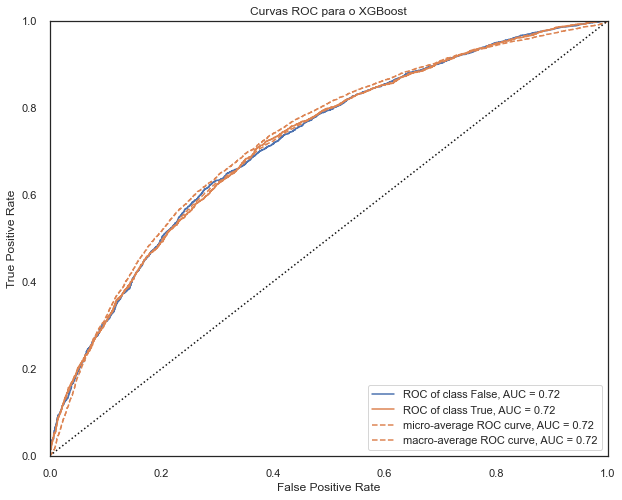

In [38]:
# Garantindo replicabilidade
np.random.seed(752)

# Plotando a curva ROC:
fig, ax = plt.subplots(figsize=(10,8))
vis_rf = ROCAUC(xgb_model, classes=['False', 'True'], title="Curvas ROC para o XGBoost")

vis_rf.fit(X_und, y_und); # Ajusta os dados de treino ao visualizador
vis_rf.score(X_test, y_test); # Avalia o modelo com os dados de teste
vis_rf.show(); # Finaliza e mostra a figura

**LightGBM**

E, o último modelo de *Machine Learning* que vamos construir é o LightGBM. Para isso vamos começar definindo o `learning_rate` como 0.1 e ajustar o parâmetro `n_estimators`.

In [39]:
# Garantindo replicabilidade
np.random.seed(752)

# Modelo LightGBM
lgbm_model = LGBMClassifier(learning_rate = 0.1)

# Ajustando o melhor valor para n_estimators
par = {'n_estimators': range(0, 1000, 50)}

lgbm_clf = GridSearchCV(lgbm_model, par, cv=ShuffleSplit(n_splits=1, test_size=0.3, random_state=77))
lgbm_clf.fit(X_und, y_und)

# Visualizar o melhor ajuste
print("Melhor ajuste: {}".format(lgbm_clf.best_params_))

Melhor ajuste: {'n_estimators': 100}


Após o ajuste do parâmetro `n_estimators`, vamos ajustar o parâmetro `num_leaves`:

In [40]:
# Garantindo replicabilidade
np.random.seed(752)

# Modelo LightGBM
lgbm_model = LGBMClassifier(learning_rate = 0.1, n_estimators = 100)

# Ajustando o melhor valor para num_leaves
par = {'num_leaves': range(1, 100, 1)}

lgbm_clf = GridSearchCV(lgbm_model, par, cv=ShuffleSplit(n_splits=1, test_size=0.3, random_state=77))
lgbm_clf.fit(X_und, y_und)

# Visualizar o melhor ajuste
print("Melhor ajuste: {}".format(lgbm_clf.best_params_))

Melhor ajuste: {'num_leaves': 31}


Agora vamos ajustar os parâmetros `max_depth` e `min_child_weight`:

In [41]:
# Garantindo replicabilidade
np.random.seed(752)

# Modelo LightGBM
lgbm_model = LGBMClassifier(learning_rate = 0.1, n_estimators = 100, num_leaves = 31, verbose = -1)

# Ajustando o melhor valor para max_depth e para min_child_weight
par = {
    'max_depth': range(1, 10, 1),
    'min_child_weight': range(1, 6, 1)
}

lgbm_clf = GridSearchCV(lgbm_model, par, cv=ShuffleSplit(n_splits=1, test_size=0.3, random_state=77))
lgbm_clf.fit(X_und, y_und)

# Visualizar o melhor ajuste
print("Melhor ajuste: {}".format(lgbm_clf.best_params_))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

Por fim, vamos ajustar o parâmetro `learning_rate`:

In [42]:
# Garantindo replicabilidade
np.random.seed(752)

# Modelo LightGBM
lgbm_model = LGBMClassifier(n_estimators = 100, num_leaves = 31, max_depth = 2, min_child_weight = 1)

# Ajustando o melhor valor para max_depth e para min_child_weight
par = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

lgbm_clf = GridSearchCV(lgbm_model, par, cv=ShuffleSplit(n_splits=1, test_size=0.3, random_state=77))
lgbm_clf.fit(X_und, y_und)

# Visualizar o melhor ajuste
print("Melhor ajuste: {}".format(lgbm_clf.best_params_))

Melhor ajuste: {'learning_rate': 0.1}


Agora, vamos construir o modelo LightGBM com todos os parâmetros ajustados:

In [43]:
# Garantindo replicabilidade
np.random.seed(752)

# Construindo o modelo LightGBM
lgbm_model = LGBMClassifier(learning_rate = 0.1, n_estimators = 100, num_leaves = 31, max_depth = 2, min_child_weight = 1)

# Fit (ajuste) do modelo
lgbm_model.fit(X_und, y_und)

# Fazendo previsões
y_pred_lgbm = lgbm_model.predict(X_test)

Avaliando o desempenho do modelo LightGBM utilizando a Área sob a curva (AUC):

In [44]:
# Garantindo replicabilidade
np.random.seed(752)

print("Área sob a curva (AUC):\t{}%".format(round(roc_auc_score(y_test, y_pred_lgbm) * 100, 2)))

Área sob a curva (AUC):	66.81%


Plotando a curva ROC:

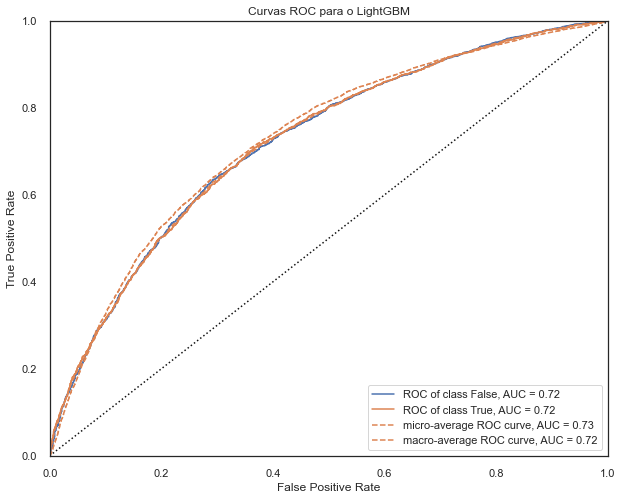

In [45]:
# Garantindo replicabilidade
np.random.seed(752)

# Plotando a curva ROC:
fig, ax = plt.subplots(figsize=(10,8))
vis_rf = ROCAUC(lgbm_model, classes=['False', 'True'], title="Curvas ROC para o LightGBM")

vis_rf.fit(X_und, y_und); # Ajusta os dados de treino ao visualizador
vis_rf.score(X_test, y_test); # Avalia o modelo com os dados de teste
vis_rf.show(); # Finaliza e mostra a figura

## **Conclusões**

Com a realização da análise exploratória dos dados e a construção dos modelos de *Machine Learning*, podemos inferir que:
- No conjunto de dados, havia algumas variáveis que não traziam informações relevantes para a construção dos modelos de *Machine Learning*, por isso foram eliminadas;
- A variável objetivo `target_default` estava altamente desbalanceada, portanto foi realizado um balanceamento;

- Foram construídos três modelos de *Machine Learning* e para a avaliação foi utilizado a métrica AUC, podendo ser visualizadp na tabela abaixo:

**Modelo**|**AUC**
----------|-------
Random Forest|65.51%
XGBoost|66.09%
LightGBM|66.81%

Assim, percebe-se que os três modelos apresentaram valores de AUC bem próximos e isso também pode ser vistos nas curvas ROC, no entanto o tempo de execução do modelo LightGBM se apresentou bem inferior, portanto esse seria o modelo selecionado para uma aplicação real.

## **Referências bibliográficas**

- MELO, C. Disponível em: < https://sigmoidal.ai/ >.
- MOURA, F. Principais aspectos a serem observados em uma avaliação de risco de crédito de EMGP. 20 de setembro de 2011. Disponível em: < https://administradores.com.br/artigos/principais-aspectos-a-serem-observados-em-uma-avaliacao-de-risco-de-credito-de-emgp >.
- RODRIGUES, V. Entenda o que é AUC e ROC nos modelos de Machine Learning. 26 de outubro de 2018. Disponível em: < https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772 >.
- RandomForestClassifier. Disponível em: < https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=classifier#sklearn.ensemble.RandomForestClassifier >.
- XGBoost. Disponível em: < https://xgboost.readthedocs.io/en/latest/python/python_api.html >.
- LGBMClassifier. Disponível em: < https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html >.